In [2]:
from IPython.core.display import HTML
HTML("""
<style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}
</style>
""")

In [30]:
import random
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns
from glob2 import glob
from tqdm.notebook import tqdm

from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import OneHotEncoder

In [80]:
results_path = "results/test"

tot_bp = np.load(f"{results_path}/bodypoints.npy")
tot_angles = np.load(f"{results_path}/angles.npy")
embed = np.load(f"{results_path}/embeddings.npy")
tot_pwr = np.load(f"{results_path}/power.npy")

fps=50
num_freq = 20
max_freq, min_freq = fps/2, 1 # Nyquist Frequency
freq = max_freq*2**(-1*np.log2(max_freq/min_freq)*(np.arange(num_freq,0,-1)-1)/(num_freq-1))

# Analyze Embeddings

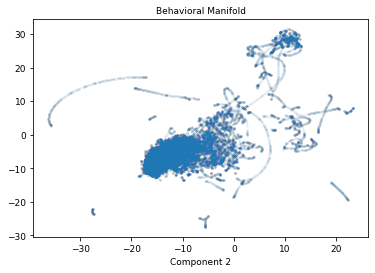

In [111]:
# create figures
embed = np.load(f"{results_path}/embeddings.npy")

plt.scatter(embed[:,0], embed[:,1], alpha=0.01, s=3)  
plt.xlabel("Component 1"); plt.xlabel("Component 2"); plt.title("Behavioral Manifold")
plt.show()

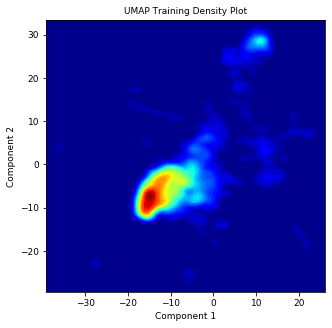

In [113]:
fig, ax = plt.subplots(figsize=(5, 5))
ax = sns.kdeplot(embed[:,0], embed[:,1], 
                 shade=True, shade_lowest=True, gridsize=100, levels=40, cmap='jet',cbar=False)
ax.set(xlabel='Component 1', ylabel='Component 2', title="UMAP Training Density Plot")
# ax.grid(True)
plt.show()

In [14]:
embed.shape

(5, 2)

In [13]:
max_cluster = 40
cluster_list = range(1, max_cluster)
bic_list = []
for i in tqdm(cluster_list):
    gmm = GaussianMixture(n_components=i)
    gmm.fit(embed)
    bic_list.append(gmm.bic(embed))
    
min_idx = np.argmin(bic_list)
# plot
plt.plot(cluster_list, bic_list, marker="o", c='k', markersize=5)
plt.scatter(min_idx+1, bic_list[min_idx], s=120, edgecolors='r', facecolors='none')
plt.xlabel("Number of Clusters"); plt.ylabel("BIC"); plt.title("Bayesian information criterion")
plt.show()

ValueError: Expected n_samples >= n_components but got n_components = 6, n_samples = 5

In [32]:
# Gaussian Mixture Model
gmm = GaussianMixture(n_components=11)
gmm_label = gmm.fit_predict(embed)

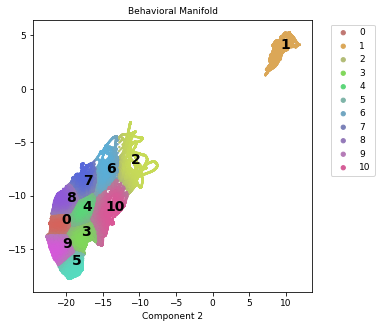

In [74]:
num_clusters = np.max(gmm_label) + 1
# compute probability
prob = np.max(gmm.predict_proba(embed), axis=1)

# choose color palette
color_palette = sns.color_palette('hls', num_clusters)
cluster_colors = [color_palette[x] for x in gmm_label]
cluster_member_colors = np.array([sns.desaturate(x, p) for x, p in zip(cluster_colors, prob)])

# create figures
plt.subplots(figsize=(5, 5))
for i in range(num_clusters):
    idx = (gmm_label==i)
    plt.scatter(embed[idx,0], embed[idx,1], 
                c=cluster_member_colors[idx], 
                alpha=1, s=2, label=i)
    plt.annotate(i, gmm.means_[i], fontsize=14, fontweight='bold')
    
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', markerscale=3)
plt.xlabel("Component 1"); plt.xlabel("Component 2"); plt.title("Behavioral Manifold")
plt.show()

0


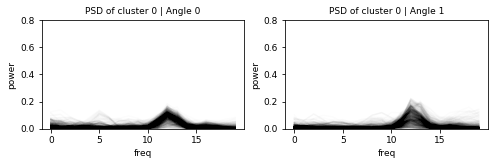

1


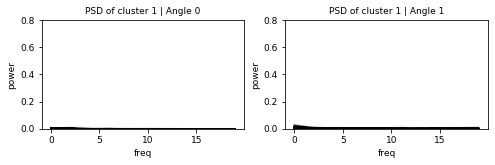

2


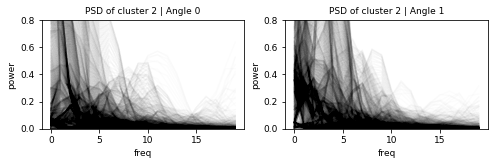

3


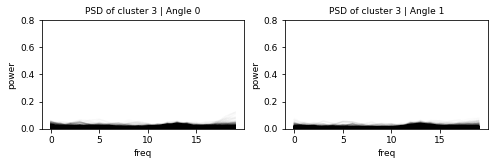

4


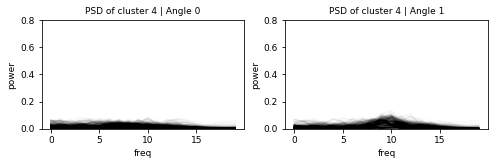

5


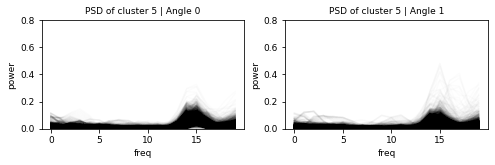

6


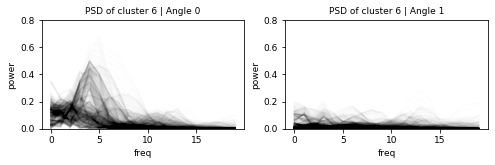

7


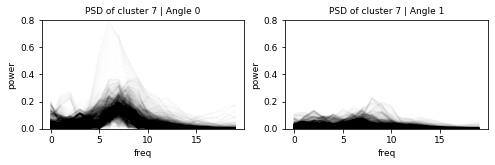

8


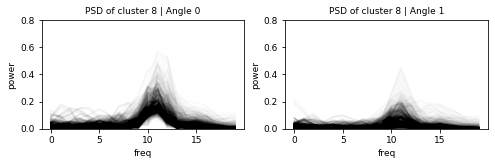

9


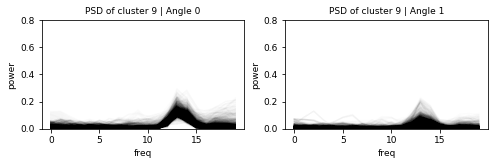

10


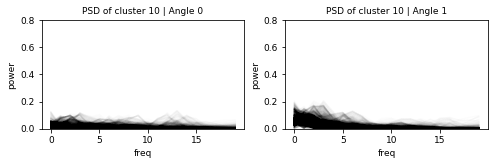

In [72]:
SMALL_SIZE = 9
matplotlib.rc('font', size=SMALL_SIZE)
matplotlib.rc('axes', titlesize=SMALL_SIZE)

num_angles, num_freq, num_fr = tot_pwr.shape

for i_cluster in range(num_clusters):
    print(i_cluster)
    idx_cluster = (gmm_label == i_cluster) & (prob>0.9)
    # plot
    fig, ax = plt.subplots(1,2,figsize=(8,2))
    for i_angle in range(num_angles):
        ax[i_angle].plot(tot_pwr[i_angle,:,idx_cluster].T, alpha=0.01, c='k')
        ax[i_angle].set_xlabel("freq"); ax[i_angle].set_ylabel("power"); ax[i_angle].set_title(f"PSD of cluster {i_cluster} | Angle {i_angle}")
        ax[i_angle].set_ylim([0,0.8])
    plt.show()

# Confirm Video

In [34]:
print(gmm_label.shape)
print(tot_angles.shape)
print(tot_pwr.shape)
print(tot_bp.shape)

(76468,)
(76468, 2)
(2, 20, 76468)
(76468, 30, 2)


In [59]:
cluster = 7
cluster_idx = np.where(gmm_label==cluster)[0]

In [58]:
cluster_idx.tolist()

[14,
 15,
 16,
 17,
 18,
 694,
 695,
 1131,
 1161,
 1162,
 1163,
 1164,
 1165,
 1166,
 1167,
 1168,
 1169,
 1170,
 1171,
 1172,
 1173,
 1174,
 1175,
 1176,
 1177,
 1178,
 1179,
 1180,
 1181,
 1182,
 1183,
 1184,
 1185,
 1186,
 1187,
 1188,
 1189,
 1190,
 1191,
 1192,
 1193,
 1194,
 1195,
 1196,
 1197,
 1198,
 1199,
 1200,
 1201,
 1202,
 1203,
 1455,
 1456,
 1457,
 1458,
 1737,
 1738,
 1790,
 1791,
 1792,
 1793,
 1794,
 1795,
 1796,
 1797,
 1798,
 1799,
 1800,
 1801,
 1802,
 1803,
 1804,
 1805,
 1806,
 1807,
 1808,
 1839,
 1840,
 1841,
 1842,
 1843,
 1844,
 1845,
 1846,
 1847,
 1848,
 1849,
 1850,
 1851,
 1852,
 1853,
 1854,
 1855,
 1856,
 1857,
 1858,
 1859,
 1958,
 1959,
 1960,
 1961,
 1962,
 1963,
 1964,
 1965,
 1966,
 1967,
 1968,
 1969,
 1970,
 2190,
 2562,
 2563,
 2564,
 2565,
 2566,
 2567,
 2568,
 2569,
 2570,
 2571,
 2572,
 2573,
 2574,
 2575,
 2576,
 2577,
 2578,
 2579,
 2580,
 2581,
 2582,
 2583,
 2584,
 2585,
 2586,
 2587,
 2588,
 2589,
 2590,
 2591,
 2592,
 2593,
 2594,
 259

In [62]:
import matplotlib.animation as animation
from scipy.stats import norm

SMALL_SIZE = 4
matplotlib.rc('font', size=SMALL_SIZE)
matplotlib.rc('axes', titlesize=SMALL_SIZE)

# frame info
analyze_cluster = 7
frame = 19294 # 13550, 19294
start_pad, stop_pad = 50, 50
start = frame-start_pad
stop = frame+stop_pad

# video info
FFMpegWriter = animation.writers['ffmpeg']
writer = FFMpegWriter(fps=2)
fig = plt.figure(constrained_layout=True)
gs = fig.add_gridspec(16, 24)
ax1 = fig.add_subplot(gs[0:8, 0:8])
ax2 = fig.add_subplot(gs[0:4, 8:])
ax3 = fig.add_subplot(gs[4:8, 8:])
ax4 = fig.add_subplot(gs[8:, 0:8])
ax5 = fig.add_subplot(gs[8:, 8:16])
ax6 = fig.add_subplot(gs[8:, 16:24])

# ethogram plot
num_clusters = np.max(gmm_label)+1

# density cluster plot
sns.kdeplot(embed[:,0], embed[:,1], shade=True, shade_lowest=True, 
            gridsize=100, levels=40, cmap='viridis',cbar=False, ax=ax6)
for clust_i in range(num_clusters):
    ax6.annotate(clust_i, gmm.means_[clust_i], fontsize=4, fontweight='bold', color='k')
ax6.set(xlabel='Component 1', ylabel='Component 2') #, title="UMAP Training Density Plot"

# scatter cluster plot
samp_frac = 0.5
num_fr, _ = embed.shape
idx = random.sample(range(num_fr), int(samp_frac*num_fr))

with writer.saving(fig, f"./videos/test/cluster{analyze_cluster}_frame{frame}.mp4", dpi=200):
    for fr_i, fr in enumerate(tqdm(np.arange(start, stop))):
        # ant plot
        ax1.clear()
        ax1.set_xlim([-4,4]); ax1.set_ylim([-5,5]);
        for shadow_i in range(-10,1):
            if shadow_i == 0:
                alpha=0.8
            else:
                alpha = 0.1
            ax1.plot(tot_bp[fr+shadow_i,0:4,0], tot_bp[fr+shadow_i,0:4,1], 
                     c='k', alpha=alpha, 
                     marker="o", markersize=3)
            ax1.plot(tot_bp[fr+shadow_i,8:11,0], tot_bp[fr+shadow_i,8:11,1], 
                     c='tab:blue', alpha=alpha, 
                     marker="o", markersize=3)
            ax1.plot(tot_bp[fr+shadow_i,21:24,0], tot_bp[fr+shadow_i,21:24,1], 
                     c='tab:orange', alpha=alpha,
                     marker="o", markersize=3)
        
        # angle plot
        ax2.clear()
        ax2.set_xlim([start,stop-1]); ax2.set_ylim([-1.0,1.0]);
        for i in range(2):
            ax2.plot(np.arange(start, fr+1), tot_angles[start:fr+1,i], alpha=0.5, linewidth=1, label=f"ang {i}")
        ax2.legend()
        ax2.set(xlabel='Frame', ylabel='Normalized Angle')
        
        # ethogram plot
        ax3.clear()
        ax3.set_xlim([start,stop-1]); ax3.set_ylim([-0.5,num_clusters]);
        ax3.scatter(np.arange(start, fr+1), gmm_label[start:fr+1], c=cluster_member_colors[start:fr+1], 
                    alpha=1, s=2, marker="s")
        ax3.set_yticks(range(0,num_clusters))
        ax3.set(xlabel='Frame', ylabel='Ethogram')
        
        # power spectrogram plot
        ax4.clear()
        for i in range(2):
            ax4.plot(freq, tot_pwr[i,:,fr].T, label=f"ang {i}", alpha=0.5, linewidth=1)
        ax4.set_xlabel("freq"); ax4.set_ylabel("power")
        ax4.set_ylim([-0.05,0.8])
        ax4.legend()
        
        # scatter cluster plot
        ax5.clear()
        ax5.scatter(embed[idx,0], embed[idx,1], 
                c=cluster_member_colors[idx], 
                alpha=0.2, s=0.1)
        ax5.plot(embed[start:fr+1,0], embed[start:fr+1,1],
                c='k', linewidth=1, alpha=0.5)
        ax5.scatter(embed[fr,0], embed[fr,1],
                c='k', s=5, marker="x")
        ax5.set(xlabel='Component 1', ylabel='Component 2', title=f"frame {fr}", xlim=ax6.get_xlim(), ylim=ax6.get_ylim())
        
        # take snapshot
        writer.grab_frame()
    writer.grab_frame()
    plt.close()